### Importing Necessary Libraries

In [45]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Matplotlib visualization
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.colors import ListedColormap
from pylab import rcParams

# Set default font size
plt.rcParams['font.size'] = 24

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)


**Reading the data set**

In [46]:
df =pd.read_csv('Cervical_Cancer_Risk_Cleaned.csv')

In [47]:
df.head()

,Unnamed: 0,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),...,STDs:molluscum contagiosum_1.0,STDs:molluscum contagiosum_nan,STDs:AIDS_0.0,STDs:AIDS_nan,STDs:HIV_0.0,STDs:HIV_1.0,STDs:HIV_nan,STDs:HPV_0.0,STDs:HPV_1.0,STDs:HPV_nan
0,0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,1,0,0,1,0,0
1,1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,1,0,0,1,0,0
2,2,34,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,1,0,0,1,0,0
3,3,52,5.0,16.0,4.0,37.0,37.0,3.0,0.0,0.0,...,0,0,1,0,1,0,0,1,0,0
4,4,46,3.0,21.0,4.0,0.0,0.0,15.0,0.0,0.0,...,0,0,1,0,1,0,0,1,0,0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 65 columns):
Unnamed: 0                                858 non-null int64
Age                                       858 non-null int64
Number of sexual partners                 858 non-null float64
First sexual intercourse                  858 non-null float64
Num of pregnancies                        858 non-null float64
Smokes (years)                            858 non-null float64
Smokes (packs/year)                       858 non-null float64
Hormonal Contraceptives (years)           858 non-null float64
IUD (years)                               858 non-null float64
STDs (number)                             858 non-null float64
STDs: Number of diagnosis                 858 non-null int64
Dx:Cancer                                 858 non-null int64
Dx:CIN                                    858 non-null int64
Dx:HPV                                    858 non-null int64
Dx                       

In [49]:
df.drop(['Unnamed: 0'], axis = 1, inplace =True)

**Basic statistics of the data**

In [50]:
df.describe(include = 'all').T

,count,mean,std,min,25%,50%,75%,max
Age,858.0,26.820513,8.497948,13.0,20.0,25.0,32.0,84.0
Number of sexual partners,858.0,2.541958,1.644264,1.0,2.0,2.0,3.0,28.0
First sexual intercourse,858.0,16.995338,2.791883,10.0,15.0,17.0,18.0,32.0
Num of pregnancies,858.0,2.322844,1.410732,0.0,1.0,2.0,3.0,11.0
Smokes (years),858.0,1.231544,4.059005,0.0,0.0,0.0,0.0,37.0
Smokes (packs/year),858.0,0.461430,2.210668,0.0,0.0,0.0,0.0,37.0
Hormonal Contraceptives (years),858.0,2.350017,3.527725,0.0,0.0,1.0,3.0,30.0
IUD (years),858.0,0.580967,1.813256,0.0,0.0,0.0,0.0,19.0
STDs (number),858.0,0.277389,0.591639,0.0,0.0,0.0,0.0,4.0
STDs: Number of diagnosis,858.0,0.087413,0.302545,0.0,0.0,0.0,0.0,3.0


**There is no missing value.**

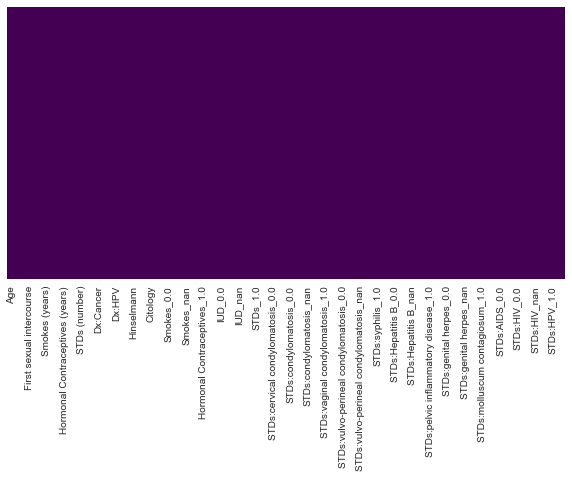

In [61]:
plt.figure(figsize = (10,5))
sns.set()
_ = sns.heatmap(df.isnull(),yticklabels=False, cbar = False, cmap = 'viridis')

### Swarm & Box plots of different features.
1. Age & Cancer
2. Number of sexual partners & Cancer
3. First sexual intercourse & Cancer
4. Numbef of pregnancies & Cancer
5. Smokes(Year) & Cancer
6. Hormonal Contraceptives (years) & Cancer

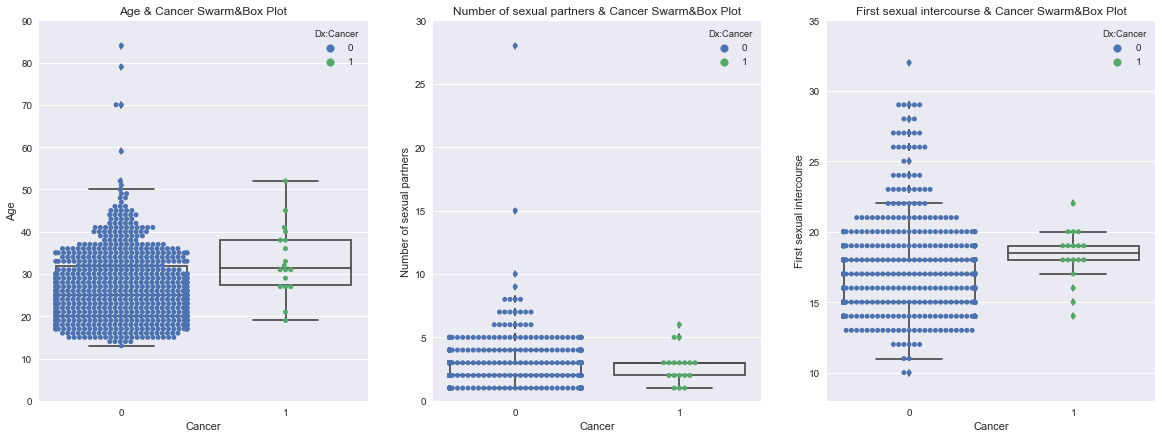

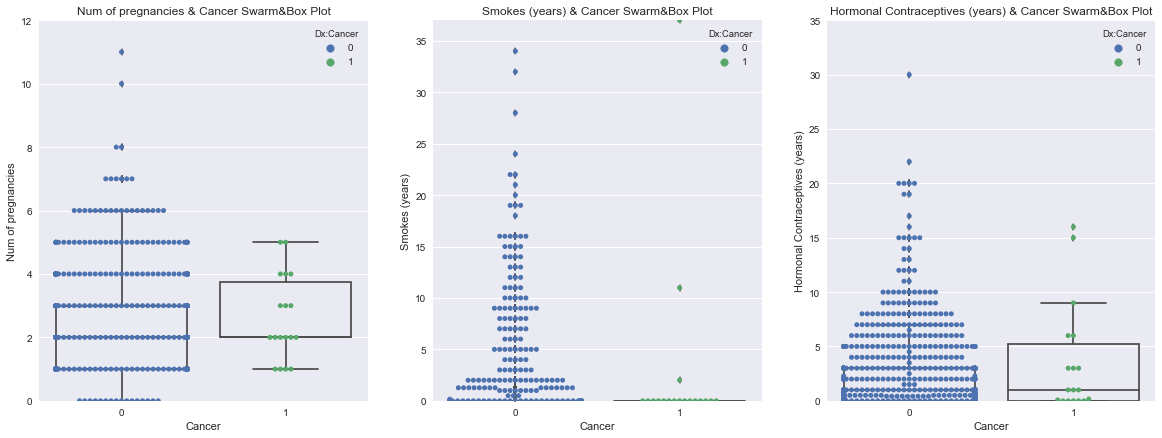

In [90]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=False)
fig.set_size_inches(20, 7)
_ = sns.swarmplot(x= 'Dx:Cancer', y = 'Age', data = df, hue = 'Dx:Cancer', ax=ax1)
_ = sns.boxplot(x= 'Dx:Cancer', y = 'Age', data=df, boxprops={'facecolor':'None'}, ax=ax1)
_ = ax1.set_xlabel('Cancer')
_ = ax1.set_ylabel('Age')
_ = ax1.set_title ('Age & Cancer Swarm&Box Plot')
_ = ax1.set_ylim(0,90)

_ = sns.swarmplot(x= 'Dx:Cancer', y = 'Number of sexual partners', data = df, hue = 'Dx:Cancer', ax=ax2)
_ = sns.boxplot(x= 'Dx:Cancer', y = 'Number of sexual partners', data=df, boxprops={'facecolor':'None'}, ax=ax2)
_ = ax2.set_xlabel('Cancer')
_ = ax2.set_ylabel('Number of sexual partners')
_ = ax2.set_title ('Number of sexual partners & Cancer Swarm&Box Plot')
_ = ax2.set_ylim(0,30)


_ = sns.swarmplot(x= 'Dx:Cancer', y = 'First sexual intercourse', data = df, hue = 'Dx:Cancer', ax=ax3)
_ = sns.boxplot(x= 'Dx:Cancer', y = 'First sexual intercourse', data=df, boxprops={'facecolor':'None'}, ax=ax3)
_ = ax3.set_xlabel('Cancer')
_ = ax3.set_ylabel('First sexual intercourse')
_ = ax3.set_title ('First sexual intercourse & Cancer Swarm&Box Plot')
_ = ax3.set_ylim(8,35)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=False)
fig.set_size_inches(20, 7)

_ = sns.swarmplot(x= 'Dx:Cancer', y = 'Num of pregnancies', data = df, hue = 'Dx:Cancer', ax=ax1)
_ = sns.boxplot(x= 'Dx:Cancer', y = 'Num of pregnancies', data=df, boxprops={'facecolor':'None'}, ax=ax1)
_ = ax1.set_xlabel('Cancer')
_ = ax1.set_ylabel('Num of pregnancies')
_ = ax1.set_title ('Num of pregnancies & Cancer Swarm&Box Plot')
_ = ax1.set_ylim(0,12)

_ = sns.swarmplot(x= 'Dx:Cancer', y = 'Smokes (years)', data = df, hue = 'Dx:Cancer', ax=ax2)
_ = sns.boxplot(x= 'Dx:Cancer', y = 'Smokes (years)', data=df, boxprops={'facecolor':'None'}, ax=ax2)
_ = ax2.set_xlabel('Cancer')
_ = ax2.set_ylabel('Smokes (years)')
_ = ax2.set_title ('Smokes (years) & Cancer Swarm&Box Plot')
_ = ax2.set_ylim(0,37)

_ = sns.swarmplot(x= 'Dx:Cancer', y = 'Hormonal Contraceptives (years)', data = df, hue = 'Dx:Cancer', ax=ax3)
_ = sns.boxplot(x= 'Dx:Cancer', y = 'Hormonal Contraceptives (years)', data=df, boxprops={'facecolor':'None'}, ax=ax3)
_ = ax3.set_xlabel('Cancer')
_ = ax3.set_ylabel('Hormonal Contraceptives (years)')
_ = ax3.set_title ('Hormonal Contraceptives (years) & Cancer Swarm&Box Plot')
_ = ax3.set_ylim(0,35)

plt.show()

1. Cancer diagnosed patient's age are cimulated between 27 to 42. One patient younger than 20 got cancer. There is no outlier from cancer patient's age. Cancer patient's median age is higher than non-cancers.

2. Cancer diagnosed patient's number of sexual partners are cimulated between 1 to 5. Most of the patients have had either 5 or less partners. It seems the correlation between number of sexual partner and cancer is not strong.

3. Cancer diagnosed patient's first sexual intercourses are cimulated between 17 to 20.There is outlier even at 10. It seems the correlation between early age sexual intercourse and cancer is not strong.Cancer patient's median first sexual intercourse age is higher than non-cancer ones.

4. Based on the 4th plot, it seems that there is no strong correlation between number of pregnancies and cancer. Cancer patient's median number ofpregnancies is higher than non-cancer.

5. It seems that there is no strong correlation between smokes(year) and cancer. Most of the patients are not cancer smoke more than 3 years as well.

6. It seems that there is no strong correlation between hormonal contraceptives and cancer. Most of the non-cancer patients use hormonal contraceptives.

### Pair grid of non-categorical columns & Cancer/HPV

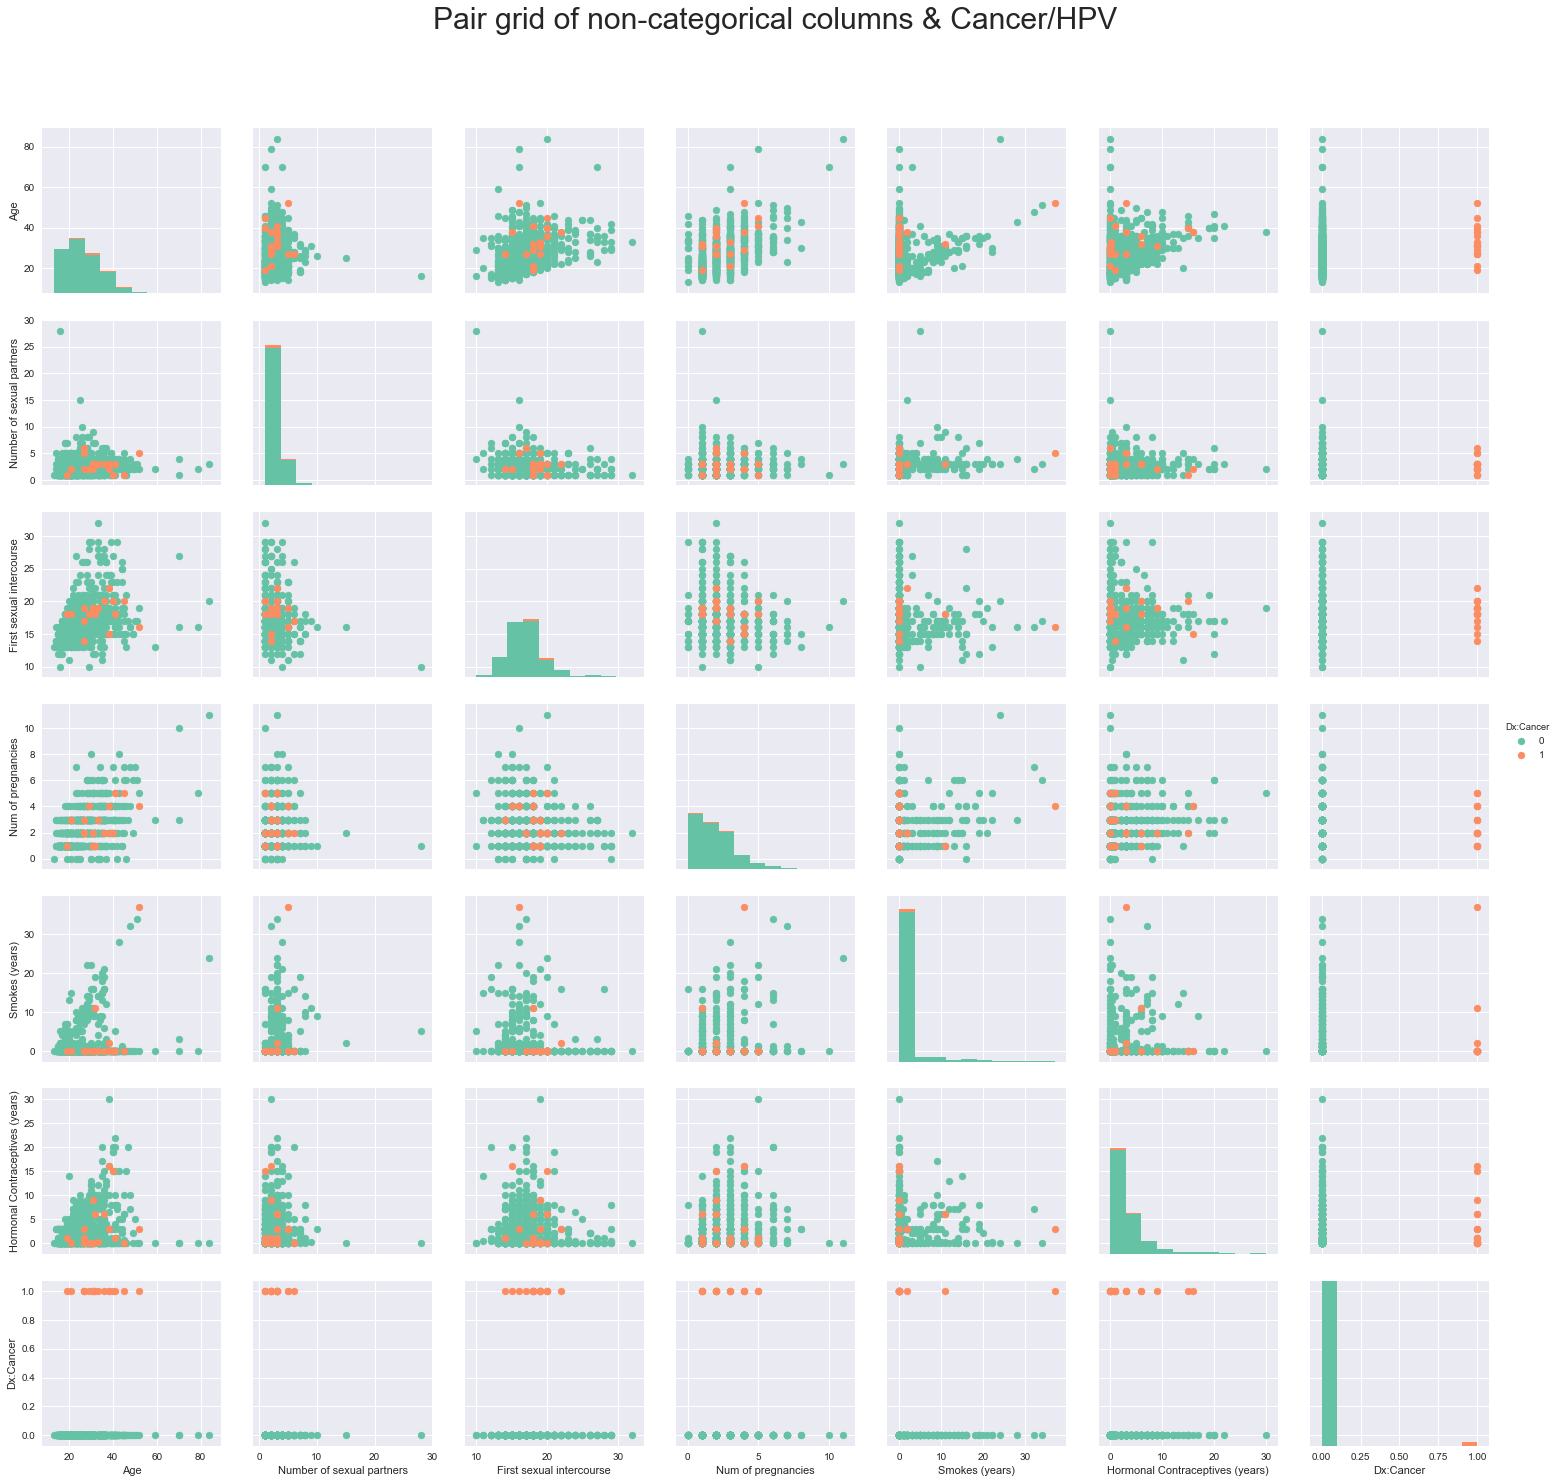

In [103]:
df2 = df[['Age', 'Number of sexual partners', 'First sexual intercourse','Num of pregnancies','Smokes (years)','Hormonal Contraceptives (years)', 'Dx:Cancer']]
g = sns.PairGrid(df2, hue="Dx:Cancer", palette="Set2", size=3)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Pair grid of non-categorical columns & Cancer/HPV', fontsize=30)
g.add_legend();

**On this pair plots we reached out the same results stated above.**

**Distribution plots of the same features.**
1. Age & Cancer
2. Number of sexual partners & Cancer
3. First sexual intercourse & Cancer

c:\users\mike\anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
c:\users\mike\anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
c:\users\mike\anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


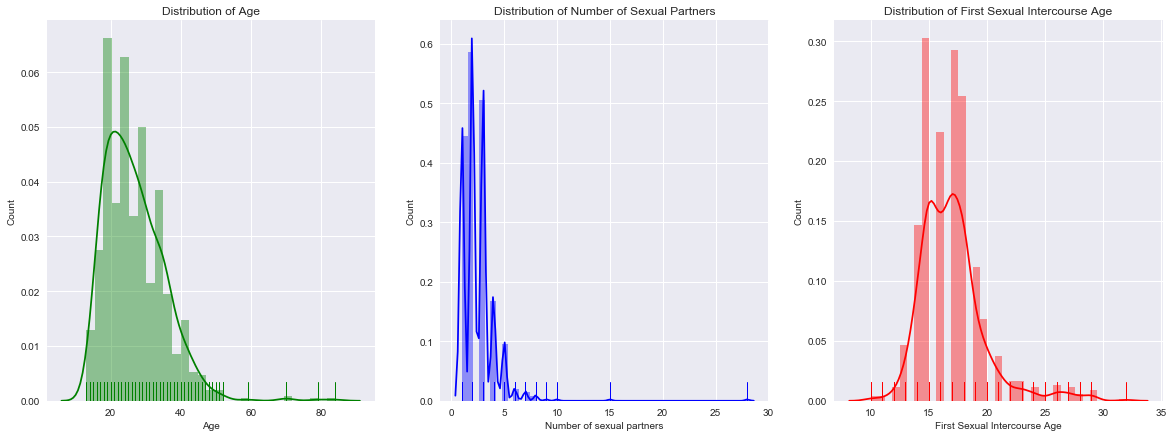

In [105]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=False)
fig.set_size_inches(20, 7)
_ = sns.distplot(df.Age, rug='True', color = 'green', norm_hist = True, ax = ax1)
_ = ax1.set_xlabel('Age', fontsize=10)
_ = ax1.set_ylabel('Count', fontsize=10)
_ = ax1.set_title('Distribution of Age', fontsize=12)

_ = sns.distplot(df['Number of sexual partners'], rug='True', color = 'blue', norm_hist = True, ax = ax2)
_ = ax2.set_xlabel('Number of sexual partners', fontsize=10)
_ = ax2.set_ylabel('Count', fontsize=10)
_ = ax2.set_title('Distribution of Number of Sexual Partners', fontsize=12)

_ = sns.distplot(df['First sexual intercourse'], rug='True', color = 'red', norm_hist = True, ax = ax3)
_ = ax3.set_xlabel('First Sexual Intercourse Age', fontsize=10)
_ = ax3.set_ylabel('Count', fontsize=10)
_ = ax3.set_title('Distribution of First Sexual Intercourse Age', fontsize=12)
plt.show()

**All three distributions looks like normal but skewed to right. On the middle plot there is only one outlier which is shown below.**

In [24]:
df[df['Number of sexual partners'] > 25]

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs: Number of diagnosis,...,STDs:molluscum contagiosum_1.0,STDs:molluscum contagiosum_nan,STDs:AIDS_0.0,STDs:AIDS_nan,STDs:HIV_0.0,STDs:HIV_1.0,STDs:HIV_nan,STDs:HPV_0.0,STDs:HPV_1.0,STDs:HPV_nan
467,16,28.0,10.0,1.0,5.0,5.0,0.0,0.0,0.0,0,...,0,0,1,0,1,0,0,1,0,0


**Correlation heatmap of all features.**

Text(0.5,1,'Heatmap of Correlation Between Features')

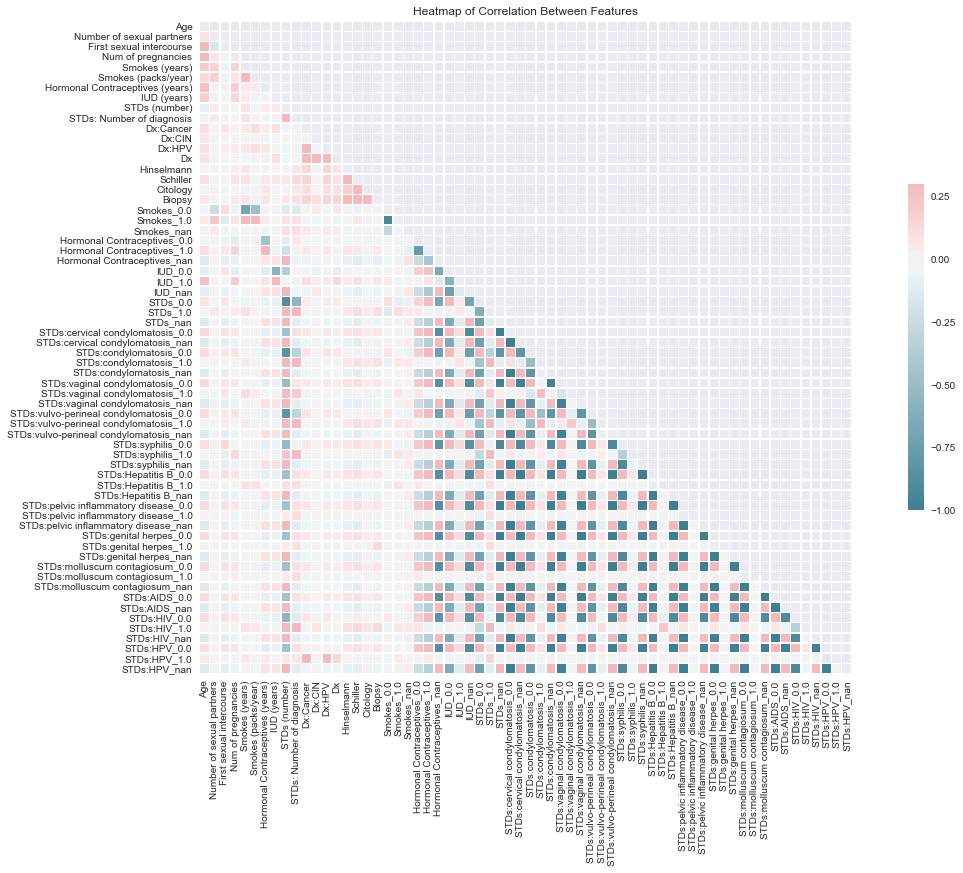

In [15]:
corr = df.corr(method="pearson")
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Heatmap of Correlation Between Features')

**As seen above some features have no correlation with 'Dx:Cancer', as expected dummy_0.0 columns have negative correlation with Dx:Cancer.**

### Scatter plot of Correlation between First sexual intercourse and Number of sexual partners. We have added regression line. 

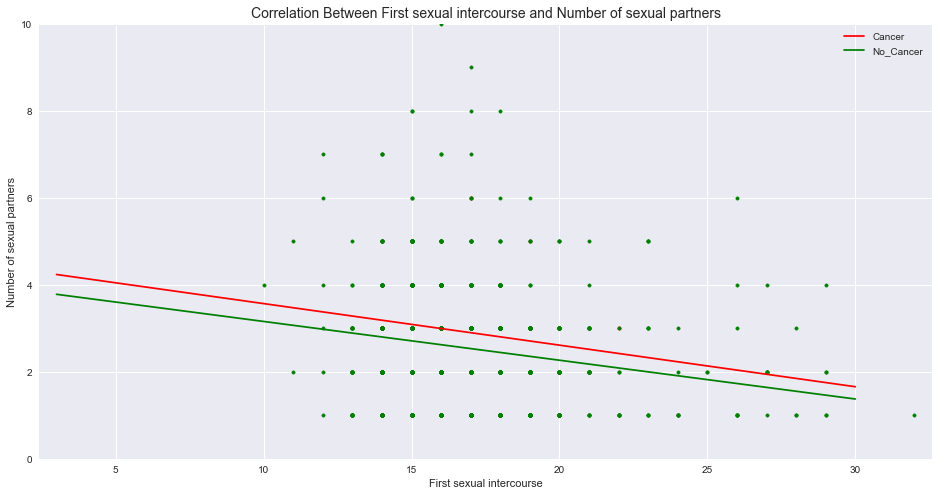

In [107]:
sns.set()
plt.figure(figsize = (16,8))
_ = plt.scatter(df['First sexual intercourse'][df['Dx:Cancer'] == 1], df['Number of sexual partners'][df['Dx:Cancer'] == 1], color = 'red', marker = '.', norm = True)
_ = plt.scatter(df['First sexual intercourse'][df['Dx:Cancer'] == 0], df['Number of sexual partners'][df['Dx:Cancer'] == 0], color = 'green', marker = '.', norm = True)

xm, ym = np.polyfit(df['First sexual intercourse'][df['Dx:Cancer'] == 1], df['Number of sexual partners'][df['Dx:Cancer'] == 1], 1)
xf, yf = np.polyfit(df['First sexual intercourse'][df['Dx:Cancer'] == 0], df['Number of sexual partners'][df['Dx:Cancer'] == 0], 1)
# Make theoretical line to plot
x = np.array([3,30])
y_m = xm * x + ym
y_f = xf * x + yf
# Add regression line to your plot
_ = plt.plot(x, y_m, color='red')
_ = plt.plot(x, y_f, color='green')
_ = plt.legend(('Cancer','No_Cancer'))
_ = plt.ylim((0,10))
_ = plt.xlabel('First sexual intercourse')
_ = plt.ylabel('Number of sexual partners')
_ = plt.title('Correlation Between First sexual intercourse and Number of sexual partners', size = 14)
plt.margins(0.02)

**There is negative regression between First sexual intercourse and Number of sexual partners for both Cancer and Non-cancer diagnosed patients.**

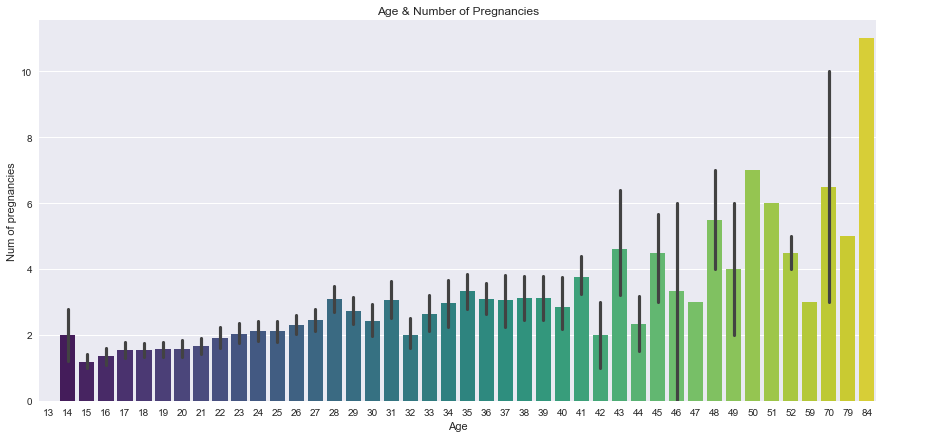

In [69]:
plt.figure(figsize = (15,7))
_ = sns.barplot(x = 'Age', y= 'Num of pregnancies', data = df, palette='viridis')
_ = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
_ = plt.title('Age & Number of Pregnancies')

**To plot the correlation heatmap of non-categorical features, we created a new data set.** 

In [25]:
df2 = df[['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies','Smokes (years)',
          'Smokes (packs/year)','Hormonal Contraceptives (years)','IUD (years)','STDs (number)',
          'STDs: Number of diagnosis','Dx:HPV', 'Dx:Cancer']]
df2.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs: Number of diagnosis,Dx:HPV,Dx:Cancer
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0
2,34,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0
3,52,5.0,16.0,4.0,37.0,37.0,3.0,0.0,0.0,0,1,1
4,46,3.0,21.0,4.0,0.0,0.0,15.0,0.0,0.0,0,0,0


**Correlation heatmap of non-categorical features, as seen below, there all features in this new data set has correlation with Cancer.**

Text(0.5,1,'Heatmap of Correlation Between Non-Categorical Features')

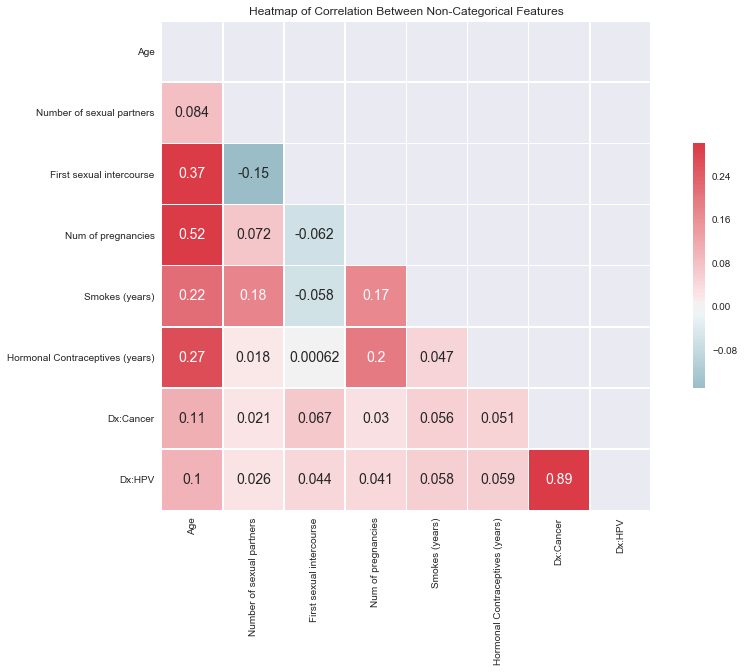

In [59]:
sns.set()
corr = df2.corr(method="pearson")

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            annot=True, annot_kws={"size": 14},
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Heatmap of Correlation Between Non-Categorical Features')

In [29]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)
    # Return entry [0,1]
    return corr_mat[0,1]

print("The pearson correlation of patients diagnosed Cancer and patients diagnoed HPV in the data set: {0:.2f}".format(pearson_r(df['Dx:Cancer'],df['Dx:HPV'])))
print ('\n')
print("The pearson correlation of patients diagnosed Cancer and patient's Age in the data set: {0:.2f}".format(pearson_r(df['Dx:Cancer'],df['Age'])))
print ('\n')
print("The pearson correlation of patients diagnosed Cancer and patient's First sexual intercourse in the data set: {0:.2f}".format(pearson_r(df['Dx:Cancer'],df['First sexual intercourse'])))

The pearson correlation of patients diagnosed Cancer and patients diagnoed HPV in the data set: 0.89


The pearson correlation of patients diagnosed Cancer and patient's Age in the data set: 0.11


The pearson correlation of patients diagnosed Cancer and patient's First sexual intercourse in the data set: 0.07


**Almost 89 patients has HPV out of every one hundred patients diagnosed Cancer. According to the correlation heatmap plot. HPV looks like the main factor for the Cervical Cancer Risk. We will examine this assumption in the hypothesis test of inferential statistics.**

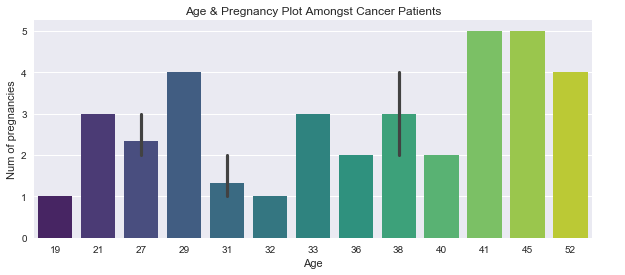

In [78]:
df3 = df[df['Dx:Cancer'] == 1][['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies','Smokes (years)']]
plt.figure(figsize = (10,4))
_ = sns.barplot(x = 'Age', y = 'Num of pregnancies', data = df3, palette='viridis')
_ = plt.legend(bbox_to_anchor=(1.05, 1), loc=4, borderaxespad=0.1)
_ = plt.title('Age & Pregnancy Plot Amongst Cancer Patients')